In [182]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

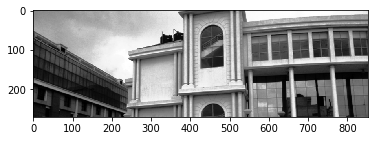

In [238]:
img = cv2.imread('rbhavanCropped.jpg',0)
img = cv2.GaussianBlur(img,(3,3),0)
img = cv2.equalizeHist(img)
#img = cv2.resize(img,(500,300))
plt.imshow(img,cmap='gray')

In [239]:
def get_gaussian_kernel_2D(ksize, sigma):

    gaussian_kernel = np.zeros((ksize, ksize))
    offset = int(ksize / 2)
    for i in range(-offset, offset + 1):
        for j in range(-offset, offset + 1):
            gaussian_kernel[i + offset][j + offset] = np.exp(-(i ** 2 + j ** 2) / (2 * sigma ** 2)) / (2 * np.pi * sigma ** 2)
    gaussian_kernel = gaussian_kernel / np.sum(gaussian_kernel)

    return gaussian_kernel

In [240]:
def mark_corner_points(image,window_size,ksize,k,gaussian_weights=False,std=1):
    """
    """
    
    new_image = image.copy()
    new_image = cv2.cvtColor(new_image,cv2.COLOR_GRAY2RGB)
    
    corners = []
    threshold = 8000
    gaussian_kernel = get_gaussian_kernel_2D(window_size,std)
    #Gradient using sobel operator
    sx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize = ksize)
    sy = cv2.Sobel(image,cv2.CV_64F,0,1,ksize = ksize)
    
    Ixx = sx**2
    Iyy = sy**2
    Ixy = sx*sy
    
    
    R_score_list =[]
    rows,cols = image.shape
    
    offset = window_size/2
    
    corner_count = 0
    for i in range(offset,rows-offset):
        for j in range(offset,cols-offset):
            
            xx_window = Ixx[i-offset:i+offset+1,j-offset:j+offset+1]
            yy_window = Iyy[i-offset:i+offset+1,j-offset:j+offset+1]
            xy_window = Ixy[i-offset:i+offset+1,j-offset:j+offset+1]
            
            if gaussian_weights:
                xx_window = xx_window*gaussian_kernel
                yy_window = yy_window*gaussian_kernel
                xy_window = xy_window*gaussian_kernel
            
            sum_xx = np.sum(xx_window)
            sum_yy = np.sum(yy_window)
            sum_xy = np.sum(xy_window)
            
            det_window = sum_xx*sum_yy - sum_xy*sum_xy
            trace_window = sum_xx + sum_yy
            
            R_score = det_window - k*trace_window*trace_window
            
            
            corners.append([i,j,R_score])
    
    corners = np.array(corners)
    threshold = 0.02*np.max(corners[:,2])
    
    for corner in corners:
        if corner[2] > threshold:
            corner_count+=1
            cv2.circle(new_image,(int(corner[1]),int(corner[0])),3,(0,0,255),1)
                
    print corner_count       
    return new_image,corners

In [241]:
corner_marked_image,corners = mark_corner_points(img,3,3,0.06)

1153


True

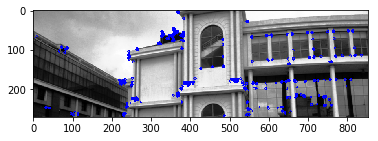

In [242]:
plt.imshow(corner_marked_image)
cv2.imwrite('corner_marked_image.png',corner_marked_image)